In [1]:
import numpy as np
import mediapipe as mp
import supervision as sv
from PIL import Image
from tqdm import tqdm

In [20]:
VIDEO_PATH = "example.mp4"
VIDEO_OUT = "out.mp4"
video_info = sv.VideoInfo.from_video_path(VIDEO_PATH)

In [21]:
model = mp.solutions.face_mesh.FaceMesh()
edge_annotator = sv.EdgeAnnotator(color=sv.Color.WHITE, thickness=1)

In [30]:
def process_frame(frame):
    resolution_wh = (frame.shape[1], frame.shape[0])  # Width, Height from frame
    results = model.process(frame)
    key_points = sv.KeyPoints.from_mediapipe(results, resolution_wh=resolution_wh)
    return edge_annotator.annotate(frame, key_points)

In [ ]:
frame_generator = sv.get_video_frames_generator(source_path=VIDEO_PATH)

with sv.VideoSink(VIDEO_OUT, video_info) as sink:
    for frame in tqdm(frame_generator, total=video_info.total_frames):
        annotated_frame = process_frame(frame)
        sink.write_frame(annotated_frame)

# DataProcessor tests

In [1]:
import sys
import os

src_path = os.path.abspath(os.path.join('../../../', 'src'))
if src_path not in sys.path:
    sys.path.append(src_path)

from tools.data_processor import DataProcessor

### SupervisionVertexProcessor

In [2]:
from tools.frame_processors import SupervisionVertexProcessor

VIDEO_PATH = "example.mp4"
VIDEO_OUT = "out.mp4"

dp = DataProcessor(SupervisionVertexProcessor())
dp.process_video(VIDEO_PATH)

100%|██████████| 510/510 [00:07<00:00, 63.83it/s]


#### With Face Extraction

In [7]:
from tools.frame_processors import SupervisionVertexProcessor
from tools.frame_preprocessors import FaceExtractionPreprocessor

VIDEO_PATH = "example.mp4"
VIDEO_OUT = "out.mp4"

dp = DataProcessor(
    frame_processor=SupervisionVertexProcessor(),
    frame_preprocessor=FaceExtractionPreprocessor(
        skip_bad_frames=True
    )
)
dp.process_video(VIDEO_PATH)

100%|██████████| 510/510 [00:13<00:00, 36.45it/s]


### SupervisionEdgesProcessor

In [8]:
from tools.frame_processors import SupervisionEdgesProcessor

VIDEO_PATH = "example.mp4"
VIDEO_OUT = "out.mp4"

dp = DataProcessor(SupervisionEdgesProcessor())
dp.process_video(VIDEO_PATH)

 25%|██▍       | 125/510 [00:08<00:26, 14.54it/s]


### Google Face Landmarker

#### Tests

In [1]:
import mediapipe as mp
import numpy as np
import cv2
import matplotlib.pyplot as plt


BaseOptions = mp.tasks.BaseOptions
FaceLandmarker = mp.tasks.vision.FaceLandmarker
FaceLandmarkerOptions = mp.tasks.vision.FaceLandmarkerOptions
VisionRunningMode = mp.tasks.vision.RunningMode

options = FaceLandmarkerOptions(
    base_options=BaseOptions(model_asset_path=os.path.join(src_path, 'models/face_landmarker.task')),
    running_mode=VisionRunningMode.IMAGE,
    output_face_blendshapes=True,
    output_facial_transformation_matrixes=True,
    num_faces=1
)

landmarker = FaceLandmarker.create_from_options(options)


NameError: name 'src_path' is not defined

In [4]:

mp_image = mp.Image.create_from_file('test_image.png')

image_data = mp_image.numpy_view()
image_bgr = cv2.cvtColor(image_data, cv2.COLOR_RGB2BGR)

cv2.imshow('MediaPipe Image', image_bgr)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:

face_landmarker_result = landmarker.detect(mp_image)

face_landmarker_result

FaceLandmarkerResult(face_landmarks=[[NormalizedLandmark(x=0.5364461541175842, y=0.2776353657245636, z=-0.022411441430449486, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.5379387140274048, y=0.25371024012565613, z=-0.06193025782704353, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.536247968673706, y=0.2598191499710083, z=-0.028673112392425537, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.5250496864318848, y=0.22575457394123077, z=-0.05383279174566269, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.5375166535377502, y=0.24548958241939545, z=-0.06765517592430115, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.536074161529541, y=0.23402781784534454, z=-0.06557483971118927, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.5319803357124329, y=0.2055772840976715, z=-0.042002007365226746, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.44470280408859253, y=0.20130568742752075, z=-0.0022403548937290907, visibility=0.0, presence=0.0), Normalize

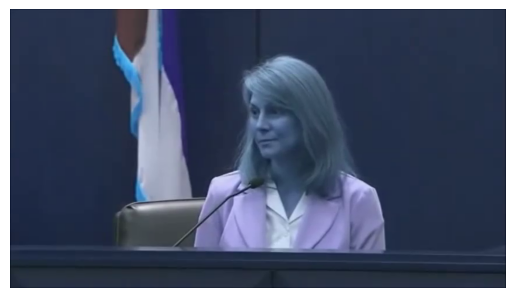

In [6]:
np_frame = np.load('test_frame.npy')

plt.imshow(np_frame)
plt.axis('off')
plt.show()

In [7]:
mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=cv2.cvtColor(image_data, cv2.COLOR_BGR2RGB))

face_landmarker_result = landmarker.detect(mp_image)

face_landmarker_result

FaceLandmarkerResult(face_landmarks=[[NormalizedLandmark(x=0.5364793539047241, y=0.27766919136047363, z=-0.02177511528134346, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.5377904772758484, y=0.2537223994731903, z=-0.06153351068496704, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.5361056327819824, y=0.25960031151771545, z=-0.028261922299861908, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.5250292420387268, y=0.22631916403770447, z=-0.05376721918582916, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.5373960137367249, y=0.24574993550777435, z=-0.06725679337978363, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.5360110402107239, y=0.23451536893844604, z=-0.06527668237686157, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.5319658517837524, y=0.20642328262329102, z=-0.042121581733226776, visibility=0.0, presence=0.0), NormalizedLandmark(x=0.44497358798980713, y=0.20132231712341309, z=-0.0033703080844134092, visibility=0.0, presence=0.0), Normal

#### Detection

In [2]:
from tools.frame_processors import GoogleFaceLandmarkDetectionProcessor


VIDEO_PATH = "example.mp4"
VIDEO_OUT = "out.mp4"
dp = DataProcessor(GoogleFaceLandmarkDetectionProcessor(os.path.join(src_path, "models/face_landmarker.task")))
dp.process_video(VIDEO_PATH)

c:\Users\Bartosz\Desktop\automatic-lie-detection\src\models/face_landmarker.task


100%|██████████| 510/510 [00:08<00:00, 60.23it/s]
